<a href="https://colab.research.google.com/github/rvargas42/TensorFlow_DeepLearningAI_Course/blob/main/C1/C1_W2_ComputerVision_Callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision


> CV is the field of using a computer to recognise objects inside an image or video. We use a dataset of images labeled as tshirts to train a neural network.



In [7]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.15.0




# 1.   Loading Data



In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# 2. Visualizing Data

Label: 9

Image Pixel Array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3 

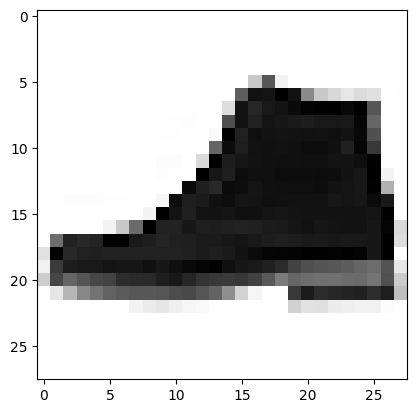

In [10]:
import matplotlib.pyplot as plt

index = 42
np.set_printoptions(linewidth=320)

print(f'Label: {train_labels[index]}')
print(f'\nImage Pixel Array:\n {train_img[index]}')

plt.imshow(train_img[index], cmap='Greys')

# 3. Building Model

> **3.1 Normalizing Data**



In [11]:
#Normalizing Data: this turns data to values from 0 to 1.
train_img = train_img/255.0
test_img = test_img/255.0


> **3.2 Initialize Model**



In [14]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(), #this is the size of the image, 28x28 pixels with values form 0 to 255 (1byte)
        tf.keras.layers.Dense(128, activation=tf.nn.relu), #relu activation function filters negative values.
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    ]
)



> **3.3 Compile Model**



In [15]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_img, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4993 - accuracy: 0.8255
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3746 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3382 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3143 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2954 - accuracy: 0.8908


In [16]:
model.evaluate(test_img, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.3365 - accuracy: 0.8779


[0.33647844195365906, 0.8779000043869019]

# 4. Implement CallBack function/class

> this will control desired training accuracy while trining and avoid loosing time.

In [17]:
class CallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}): #this is an standard function for .Callback
        if(logs.get('loss')<0.4):
            print("\nLoss is low -> Cancelling further training")
            self.model.stop_training = True #acceses Callback class and sets stop_training = True

In [18]:
callbacks = CallBack()

In [19]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_img, train_labels, epochs=5, callbacks = [callbacks])

Epoch 1/5
1870/1875 [============================>.] - ETA: 0s - loss: 0.2830 - accuracy: 0.8948
Loss is low -> Cancelling further training
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2829 - accuracy: 0.8949
